In [1]:
### Load all relevant libraries ###

import pandas as pd
import numpy as np
import scipy
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
### Load data ###

df = pd.read_csv("Field_measurement_data.csv")
print(df)

     Length  Width    Flat De   Round De  Flat ws (cm/s)  Round ws (cm/s)
0    129.29  17.84  12.703752  32.243306        0.585769         3.773475
1     78.89  15.57  11.277895  26.875940        0.461656         2.621740
2    173.42  13.93  11.801964  27.170344        0.505558         2.679493
3     64.51   7.53   8.151599  14.554018        0.241184         0.768826
4     16.65   1.48   2.964024   3.095530        0.031888         0.034780
..      ...    ...        ...        ...             ...              ...
487  101.76  13.87  11.088204  25.337718        0.446257         2.330222
488   87.32   9.38   9.242829  18.011316        0.310079         1.177479
489  266.31  15.57  12.941689  31.217657        0.607917         3.537227
490  304.35  10.04  10.842076  21.896300        0.426665         1.740219
491  128.07   5.95   8.052240  13.336889        0.235340         0.645612

[492 rows x 6 columns]


In [3]:
### Mean ###

df.mean(axis = 0)

Length             121.401016
Width               10.488811
Flat De              9.253189
Round De            19.451215
Flat ws (cm/s)       0.339954
Round ws (cm/s)      1.719977
dtype: float64

In [4]:
### Median ###

df.median(axis = 0)

Length             72.635000
Width               9.850000
Flat De             9.325746
Round De           18.760029
Flat ws (cm/s)      0.315667
Round ws (cm/s)     1.277407
dtype: float64

In [5]:
### Standard deviation ###

df.std(axis = 0)

Length             147.419656
Width                5.539276
Flat De              2.838269
Round De             9.783453
Flat ws (cm/s)       0.194377
Round ws (cm/s)      1.614616
dtype: float64

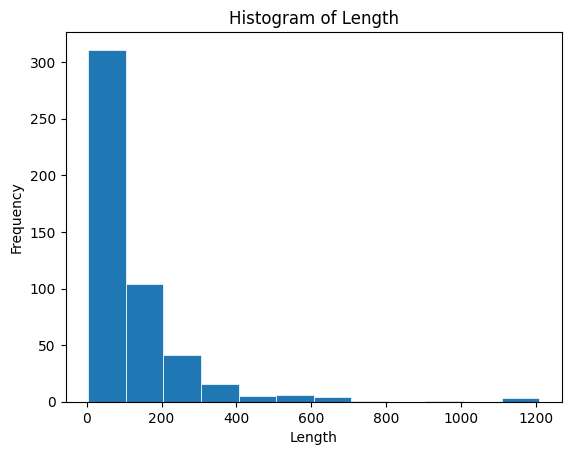

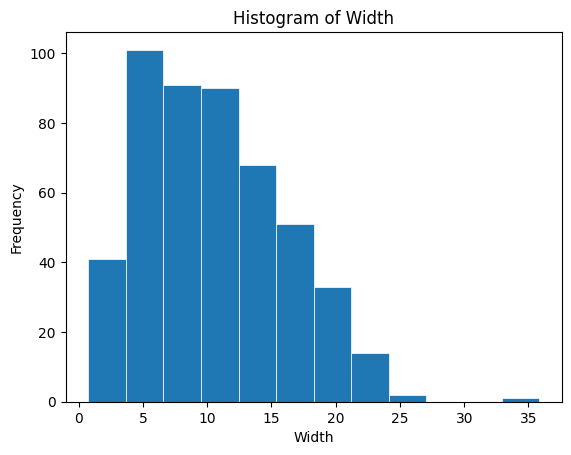

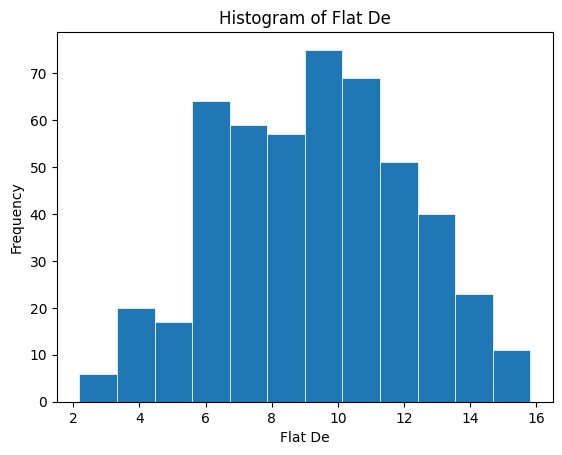

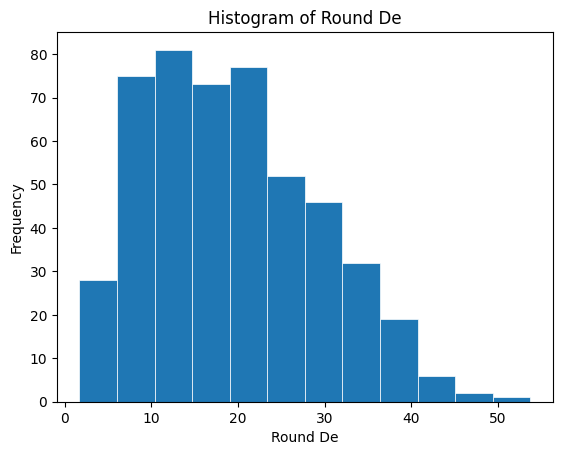

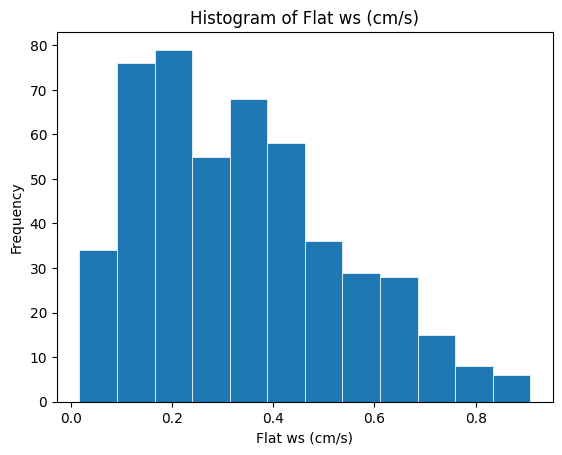

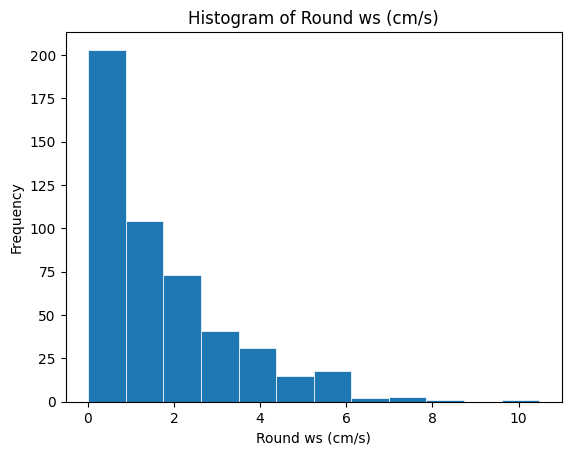

In [6]:
### Histograms ###

for i in df:
    fig,ax = plt.subplots()
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + i)
    plt.hist(df[i], bins = 12, linewidth = 0.5, edgecolor = "white")

In [7]:
### Pearson correlation coefficient ###

# Test 1: Length vs. flat ws
# Test 2: Length vs. round ws
# Test 3: Width vs. flat ws
# Test 4: Width vs. round ws

PearsonTest1 = stats.pearsonr(df["Length"], df["Flat ws (cm/s)"])
PearsonTest2 = stats.pearsonr(df["Length"], df["Round ws (cm/s)"])
PearsonTest3 = stats.pearsonr(df["Width"], df["Flat ws (cm/s)"])
PearsonTest4 = stats.pearsonr(df["Width"], df["Round ws (cm/s)"])

print("Length versus Flat WS:", PearsonTest1)
print("Length versus Round WS:", PearsonTest2)
print("Width versus Flat WS:", PearsonTest3)
print("Width versus Round WS:", PearsonTest4)

Length versus Flat WS: PearsonRResult(statistic=0.5756469154020929, pvalue=9.232862522882866e-45)
Length versus Round WS: PearsonRResult(statistic=0.47123842322941883, pvalue=1.449981809799419e-28)
Width versus Flat WS: PearsonRResult(statistic=0.9331535018050207, pvalue=7.346185753512967e-220)
Width versus Round WS: PearsonRResult(statistic=0.9429277777754641, pvalue=3.7842941887108566e-236)


In [8]:
### Spearman correlation coefficient ###

SpearmanTest1 = stats.spearmanr(df["Length"], df["Flat ws (cm/s)"])
SpearmanTest2 = stats.spearmanr(df["Length"], df["Round ws (cm/s)"])
SpearmanTest3 = stats.spearmanr(df["Width"], df["Flat ws (cm/s)"])
SpearmanTest4 = stats.spearmanr(df["Width"], df["Round ws (cm/s)"])

print("Length versus Flat WS:", SpearmanTest1)
print("Length versus Round WS:", SpearmanTest2)
print("Width versus Flat WS:", SpearmanTest3)
print("Width versus Round WS:", SpearmanTest4)

Length versus Flat WS: SignificanceResult(statistic=0.7427614266969041, pvalue=2.0926392776828753e-87)
Length versus Round WS: SignificanceResult(statistic=0.6676721162582042, pvalue=8.549519200352835e-65)
Width versus Flat WS: SignificanceResult(statistic=0.9461772654113433, pvalue=3.2873240387545113e-242)
Width versus Round WS: SignificanceResult(statistic=0.9760325715220597, pvalue=0.0)


In [9]:
### Linear regression ###

linR_1 = scipy.stats.linregress(df["Length"], df["Flat ws (cm/s)"]) # Test 1
m1 = np.round(linR_1.slope, 5)
b1 = np.round(linR_1.intercept, 5)
r1 = np.round(linR_1.rvalue, 5)
p1 = linR_1.pvalue
print("(Length versus Flat WS)", "Regression Line: y=" + str(m1) + "x+" + str(b1), "; R=" + str(r1), "; p=" + str(p1))

linR_2 = scipy.stats.linregress(df["Length"], df["Round ws (cm/s)"]) # Test 2
m2 = np.round(linR_2.slope, 5)
b2 = np.round(linR_2.intercept, 5)
r2 = np.round(linR_2.rvalue, 5)
p2 = linR_2.pvalue
print("(Length versus Round WS)", "Regression Line: y=" + str(m2) + "x+" + str(b2), "; R=" + str(r2), "; p=" + str(p2))

linR_3 = scipy.stats.linregress(df["Width"], df["Flat ws (cm/s)"]) # Test 3
m3 = np.round(linR_3.slope, 5)
b3 = np.round(linR_3.intercept, 5)
r3 = np.round(linR_3.rvalue, 5)
p3 = linR_3.pvalue
print("(Width versus Flat WS)", "Regression Line: y=" + str(m3) + "x+" + str(b3), "; R=" + str(r3), "; p=" + str(p3))

linR_4 = scipy.stats.linregress(df["Width"], df["Round ws (cm/s)"]) # Test 4
m4 = np.round(linR_4.slope, 5)
b4 = np.round(linR_4.intercept, 5)
r4 = np.round(linR_4.rvalue, 5)
p4 = linR_4.pvalue
print("(Width versus Round WS)", "Regression Line: y=" + str(m4) + "x+" + str(b4), "; R=" + str(r4), "; p=" + str(p4))

(Length versus Flat WS) Regression Line: y=0.00076x+0.24781 ; R=0.57565 ; p=9.23286252288294e-45
(Length versus Round WS) Regression Line: y=0.00516x+1.0934 ; R=0.47124 ; p=1.4499818097995301e-28
(Width versus Flat WS) Regression Line: y=0.03274x+-0.0035 ; R=0.93315 ; p=7.346185753512656e-220
(Width versus Round WS) Regression Line: y=0.27485x+-1.16287 ; R=0.94293 ; p=3.78429418871571e-236


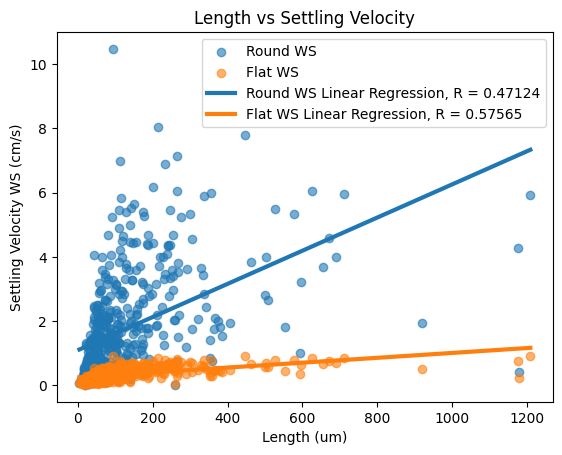

In [10]:
### Scatter plots + linear regression lines ###

# Graph 1: length
fig,ax = plt.subplots()
ax.set_xlabel('Length (um)')
ax.set_ylabel('Settling Velocity WS (cm/s)')
ax.set_title('Length vs Settling Velocity')
plt.scatter(df['Length'], df['Round ws (cm/s)'], alpha = 0.6)
plt.scatter(df['Length'], df['Flat ws (cm/s)'], alpha = 0.6)

linR_2 = scipy.stats.linregress(df["Length"], df["Round ws (cm/s)"])
x = [0, 100]
y = [0, 100]
x[0] = df["Length"].min()
y[0] = (linR_2.slope * x[0]) + linR_2.intercept
x[1] = df["Length"].max()
y[1] = (linR_2.slope * x[1]) + linR_2.intercept
plt.plot(x, y, lw = 3)

linR_1 = scipy.stats.linregress(df["Length"], df["Flat ws (cm/s)"])
x = [0, 100]
y = [0, 100]
x[0] = df["Length"].min()
y[0] = (linR_1.slope * x[0]) + linR_1.intercept
x[1] = df["Length"].max()
y[1] = (linR_1.slope * x[1]) + linR_1.intercept
plt.plot(x, y, lw = 3)

ax.legend(["Round WS", "Flat WS", "Round WS Linear Regression, R = " + str(r2), "Flat WS Linear Regression, R = " + str(r1)])

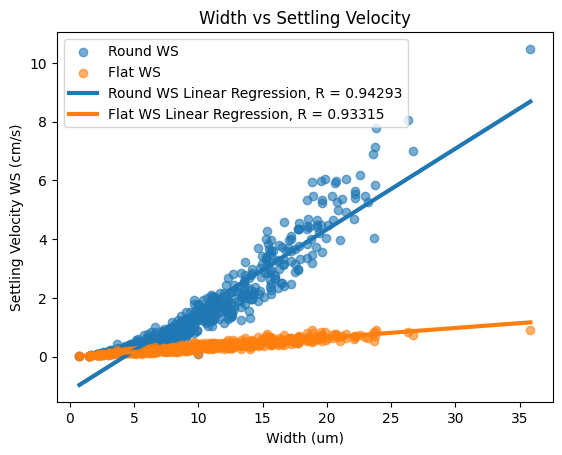

In [11]:
### Scatter plots + linear regression lines ###

# Graph 2: width
fig,ax = plt.subplots()
ax.set_xlabel('Width (um)')
ax.set_ylabel('Settling Velocity WS (cm/s)')
ax.set_title('Width vs Settling Velocity')
plt.scatter(df['Width'], df['Round ws (cm/s)'], alpha = 0.6)
plt.scatter(df['Width'], df['Flat ws (cm/s)'], alpha = 0.6)

linR_4 = scipy.stats.linregress(df["Width"], df["Round ws (cm/s)"])
x = [0, 100]
y = [0, 100]
x[0] = df["Width"].min()
y[0] = (linR_4.slope * x[0]) + linR_4.intercept
x[1] = df["Width"].max()
y[1] = (linR_4.slope * x[1]) + linR_4.intercept
plt.plot(x, y, lw = 3)

linR_3 = scipy.stats.linregress(df["Width"], df["Flat ws (cm/s)"])
x = [0, 100]
y = [0, 100]
x[0] = df["Width"].min()
y[0] = (linR_3.slope * x[0]) + linR_3.intercept
x[1] = df["Width"].max()
y[1] = (linR_3.slope * x[1]) + linR_3.intercept
plt.plot(x, y, lw = 3)

ax.legend(["Round WS", "Flat WS", "Round WS Linear Regression, R = " + str(r4), "Flat WS Linear Regression, R = " + str(r3)])

[[ 0.44421745  0.61019907  0.65599387]
 [ 0.87327524 -0.45848188 -0.16487789]
 [ 0.20015297  0.64610484 -0.73653739]]


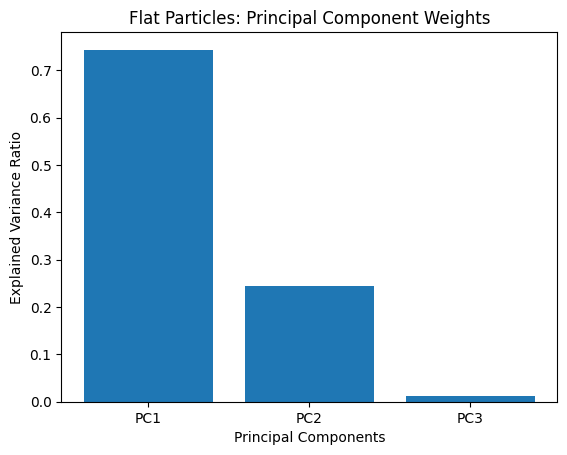

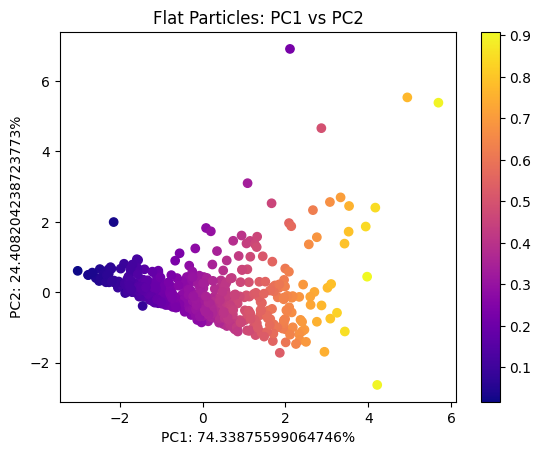

In [12]:
### PCA for flat particles ###

# Filter data
df_flat = df.drop(["Round De", "Flat ws (cm/s)", "Round ws (cm/s)"], axis = 1)
#print(df_flat)

# Rescaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_flat)

# PCA Analysis
pca = PCA(n_components = 0.99)
PCs = pca.fit_transform(scaled_data)
pca_evr = pca.explained_variance_ratio_

#print(PCs)
#print(pca.explained_variance_ratio_)
print(pca.components_)

# Bar chart
fig,ax = plt.subplots()
ax.set_xlabel("Principal Components")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title('Flat Particles: Principal Component Weights')
plt.bar(["PC1", "PC2", "PC3"], pca_evr)

# PC1 vs. PC2
pc1pct = str(pca.explained_variance_ratio_[0] * 100) + "%"
pc2pct = str(pca.explained_variance_ratio_[1] * 100) + "%"

fig,ax = plt.subplots()
ax.set_xlabel("PC1: " + pc1pct)
ax.set_ylabel("PC2: " + pc2pct)
ax.set_title('Flat Particles: PC1 vs PC2')
plt.scatter(PCs[:, 0], PCs[:, 1], c = df['Flat ws (cm/s)'], cmap = "plasma") 
plt.colorbar()

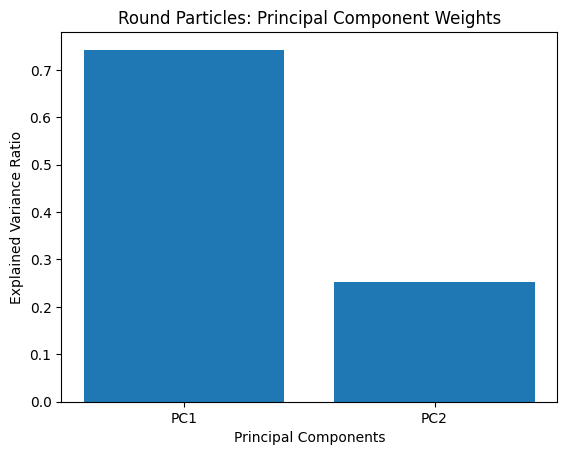

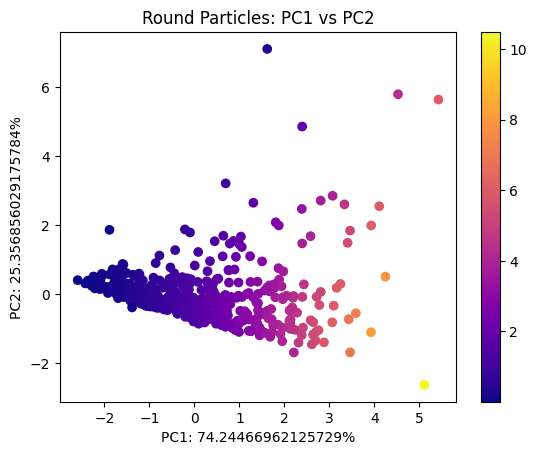

In [13]:
### PCA for round particles ###

# Filter data
df_round = df.drop(["Flat De", "Flat ws (cm/s)", "Round ws (cm/s)"], axis = 1)
#print(df_round)

# Rescaling
scaler2 = StandardScaler()
scaled_data2 = scaler2.fit_transform(df_round)

# PCA Analysis
pca2 = PCA(n_components = 0.99)
PCs2 = pca2.fit_transform(scaled_data2)
pca_evr2 = pca2.explained_variance_ratio_

#print(PCs2)
#print(pca2.explained_variance_ratio_)
#print(pca2.components_)

# Bar chart
fig,ax = plt.subplots()
ax.set_xlabel("Principal Components")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title('Round Particles: Principal Component Weights')
plt.bar(["PC1", "PC2"], pca_evr2)

# PC1 vs. PC2
pc1pct2 = str(pca2.explained_variance_ratio_[0] * 100) + "%"
pc2pct2 = str(pca2.explained_variance_ratio_[1] * 100) + "%"

fig,ax = plt.subplots()
ax.set_xlabel("PC1: " + pc1pct2)
ax.set_ylabel("PC2: " + pc2pct2)
ax.set_title('Round Particles: PC1 vs PC2')
plt.scatter(PCs2[:, 0], PCs2[:, 1], c = df['Round ws (cm/s)'], cmap = "plasma") 
plt.colorbar()